In [ ]:
from utils import SerialClient
import time

# Init Serial Client
client = SerialClient("COM3")

In [ ]:
# Make sure motor is on and set to start position for calibration and check that communication is working
client.motor_on()
pos = 1500
client.set_pos(pos)
time.sleep(0.1)
client.get_data()

In [ ]:
# Parameters for flame scan
filename = "data/experiment_log.csv"
start_pos = 1500
measurement_delay_ms = 100
step_size = 1
max_pulse = 1700
min_pulse = 1300

# Start logging to csv file
client.start_csv_flame_scan(filename, start_pos, measurement_delay_ms, step_size, min_pulse, max_pulse)

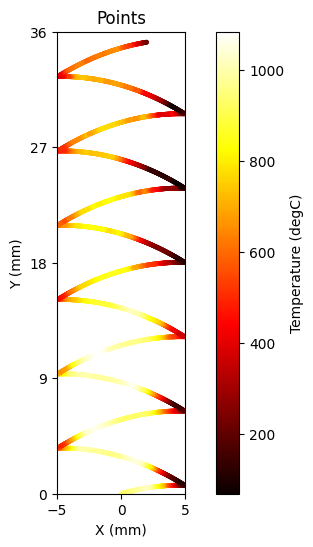

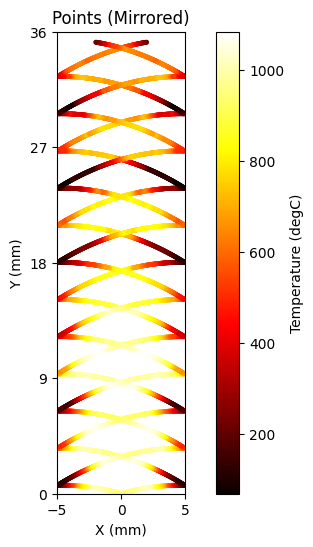

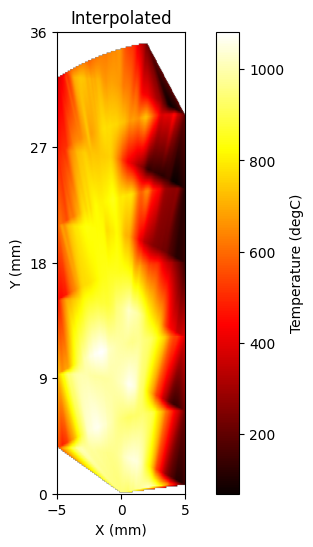

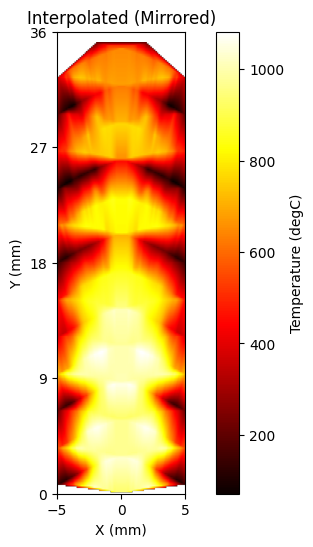

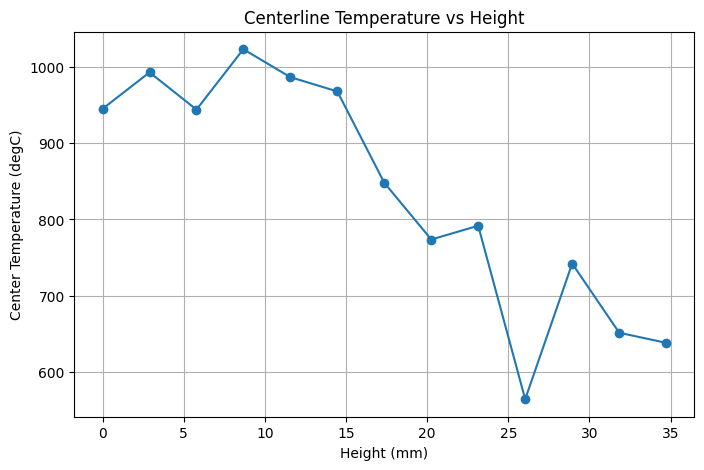

In [1]:
from utils import FlameScan
import numpy as np
from pathlib import Path

# Parameters for analyzing the flame scan
data_path = "data/experiment_log.csv"
radius_mm_servo = 16
ø_ref_min = np.deg2rad(-90)
ø_ref_max = np.deg2rad(90)
p_ref_min = 2500
p_ref_max = 500
burn_dt_s = 10 * 60
burn_dy_mm = 40

# Load data
scan = FlameScan(
    data_path,
    radius_mm_servo=radius_mm_servo,
    ø_ref_min=ø_ref_min,
    ø_ref_max=ø_ref_max,
    p_ref_min=p_ref_min,
    p_ref_max=p_ref_max,
    burn_dt_s=burn_dt_s,
    burn_dy_mm=burn_dy_mm,
 )

# Create export directory
fig_dir = Path("data/figures")
fig_dir.mkdir(parents=True, exist_ok=True)

# 1. Raw data
scan.plot_points(
    mirror=False,
    cmap="hot",
    save_path=str(fig_dir / "experiment_plot_1.png"),
 )

# 2. Mirrored data
scan.plot_points(
    mirror=True,
    cmap="hot",
    save_path=str(fig_dir / "experiment_plot_2.png"),
 )

# 3. Interpolated heatmap
scan.plot_heatmap(
    mirror=False,
    cmap="hot",
    save_path=str(fig_dir / "experiment_plot_3.png"),
 )

# 4. Mirrored Interpolated heatmap
scan.plot_heatmap(
    mirror=True,
    cmap="hot",
    save_path=str(fig_dir / "experiment_plot_4.png"),
 )

# 5. Temperature at centerline over height
scan.plot_centerline(
    save_path=str(fig_dir / "experiment_plot_5.png"),
 )

